# Business Understanding
The goal is to identify and predict patterns and factors that contribute to customer churn, helping telecom companies improve retention strategies. This allows the business to intervene early and potentially reduce customer loss, hence saving revenue. The audience is the telecom business. The telecom business is interested in reducing income as a result of customers not sticking around for long. 

## Question: How accurate is the churn prediction model in identifying customers who are likely to leave?

Analytics/KPIs:

* Model Accuracy / Precision / Recall / F1 Score

* ROC-AUC Score (overall model performance)

* Confusion Matrix (True Positives, False Positives, etc.)

* Lift and Gain Charts (effectiveness of the model at different thresholds)

## Data Understanding
Exploratory Data Analysis: Telecom_Churn
Objective
To develop a predictive model for customer churn in a telecom company, aiming to accurately classify whether a customer is likely to leave or stay.

Data Overview
Import necessary libraries
Load the dataset
Clean the dataset
Split into features and target
Train Random Forest classifier
Plot Confusion Matrix
Visualization

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Load the dataset
df = pd.read_csv('telecom_churn.csv')
df.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


1. A simple, interpretable baseline model (logistic regression or single decision tree)
   
2. version of the simple model with tuned hyperparameters

 Split: 80% training and 20% testing, stratified on the target (Churn), ensuring balanced class distribution in both sets. 

Scaling: All features standardized using StandardScaler—essential for most ML algorithms that assume normally-distributed da.ta

In [15]:
# Split into features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5] 
 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]


## Modeling
### Model features and preprocessing approaches
1. Simple, interpretable baseline model (logistic regression)

In [16]:
# Define baseline classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

results

{'Logistic Regression': {'Accuracy': 0.8545727136431784,
  'Confusion Matrix': array([[553,  17],
         [ 80,  17]], dtype=int64),
  'Classification Report': {'0': {'precision': 0.8736176935229067,
    'recall': 0.9701754385964912,
    'f1-score': 0.9193682460515379,
    'support': 570},
   '1': {'precision': 0.5,
    'recall': 0.17525773195876287,
    'f1-score': 0.2595419847328244,
    'support': 97},
   'accuracy': 0.8545727136431784,
   'macro avg': {'precision': 0.6868088467614534,
    'recall': 0.572716585277627,
    'f1-score': 0.5894551153921812,
    'support': 667},
   'weighted avg': {'precision': 0.8192834862189758,
    'recall': 0.8545727136431784,
    'f1-score': 0.8234115034009903,
    'support': 667}}},
 'Random Forest': {'Accuracy': 0.9250374812593704,
  'Confusion Matrix': array([[557,  13],
         [ 37,  60]], dtype=int64),
  'Classification Report': {'0': {'precision': 0.9377104377104377,
    'recall': 0.9771929824561404,
    'f1-score': 0.9570446735395188,
    

2. version of the simple model with tuned hyperparameters

In [17]:
# Define baseline classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

results

{'Logistic Regression': {'Accuracy': 0.8545727136431784,
  'Confusion Matrix': array([[553,  17],
         [ 80,  17]], dtype=int64),
  'Classification Report': {'0': {'precision': 0.8736176935229067,
    'recall': 0.9701754385964912,
    'f1-score': 0.9193682460515379,
    'support': 570},
   '1': {'precision': 0.5,
    'recall': 0.17525773195876287,
    'f1-score': 0.2595419847328244,
    'support': 97},
   'accuracy': 0.8545727136431784,
   'macro avg': {'precision': 0.6868088467614534,
    'recall': 0.572716585277627,
    'f1-score': 0.5894551153921812,
    'support': 667},
   'weighted avg': {'precision': 0.8192834862189758,
    'recall': 0.8545727136431784,
    'f1-score': 0.8234115034009903,
    'support': 667}}},
 'Random Forest': {'Accuracy': 0.9250374812593704,
  'Confusion Matrix': array([[557,  13],
         [ 37,  60]], dtype=int64),
  'Classification Report': {'0': {'precision': 0.9377104377104377,
    'recall': 0.9771929824561404,
    'f1-score': 0.9570446735395188,
    

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8605697151424287
Precision: 1.0
Recall: 0.041237113402061855
F1 Score: 0.0792079207920792
ROC AUC: 0.8603002351238921
Confusion Matrix:
 [[570   0]
 [ 93   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       570
           1       1.00      0.04      0.08        97

    accuracy                           0.86       667
   macro avg       0.93      0.52      0.50       667
weighted avg       0.88      0.86      0.80       667



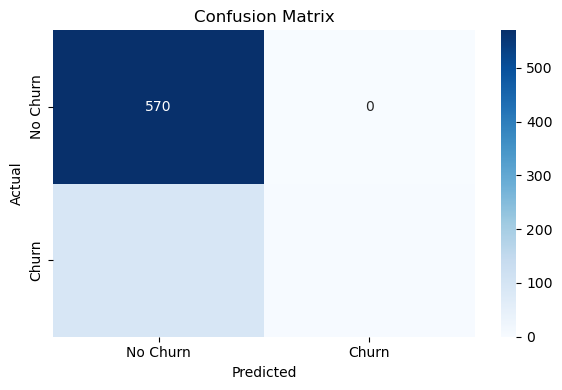

In [19]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

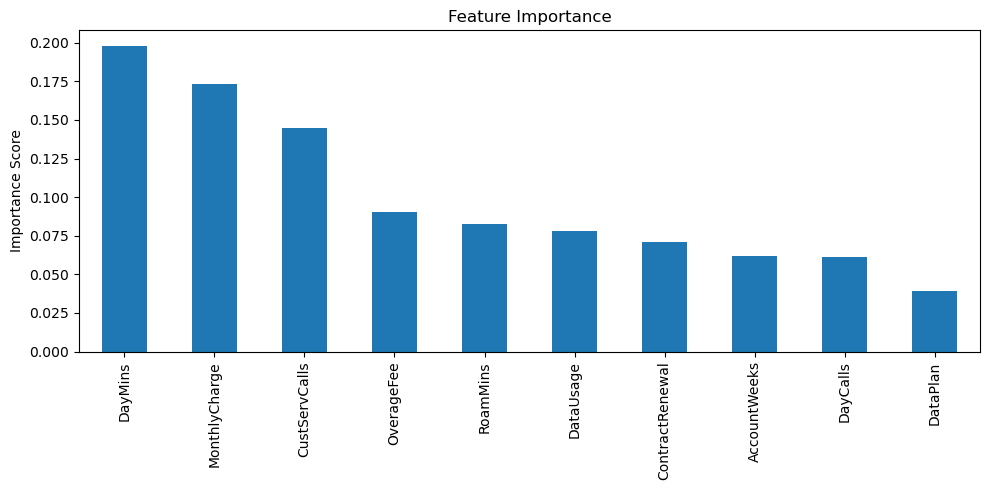

In [20]:
# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

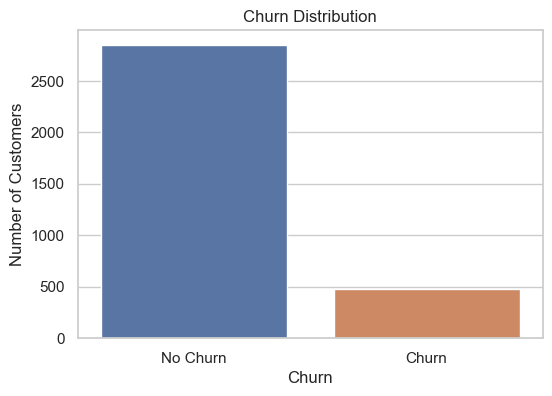

In [21]:
# Visualization
df_viz = df.copy()

# Set visual style
sns.set(style="whitegrid")

# 1. Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_viz)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.show()


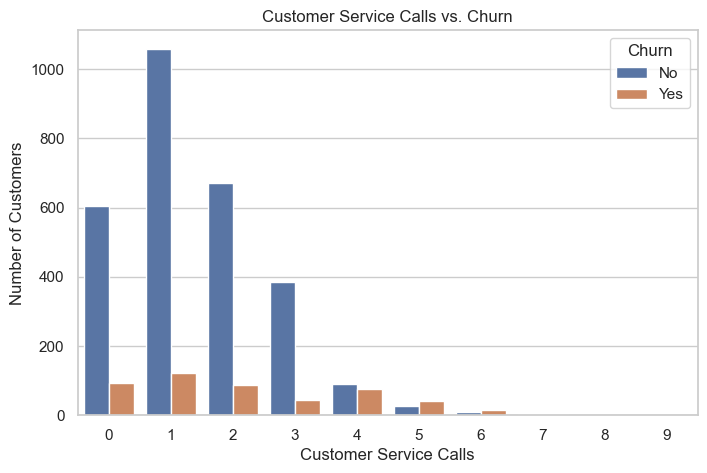

In [22]:
# Customer service calls vs. churn

df_viz['Churn'] = df_viz['Churn'].astype(str)

plt.figure(figsize=(8, 5))
sns.countplot(x='CustServCalls', hue='Churn', data=df_viz)
plt.title('Customer Service Calls vs. Churn')
plt.xlabel('Customer Service Calls')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

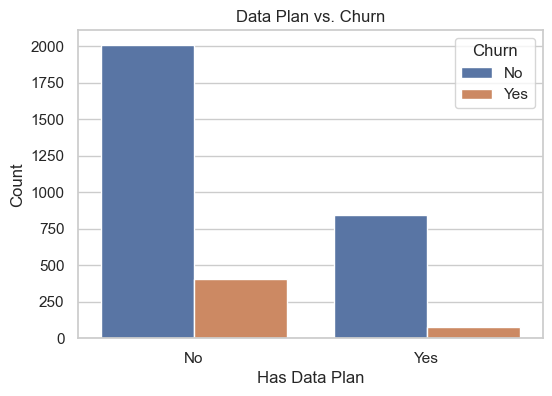

In [23]:
# Data Plan vs. Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='DataPlan', hue='Churn', data=df_viz)
plt.title('Data Plan vs. Churn')
plt.xlabel('Has Data Plan')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

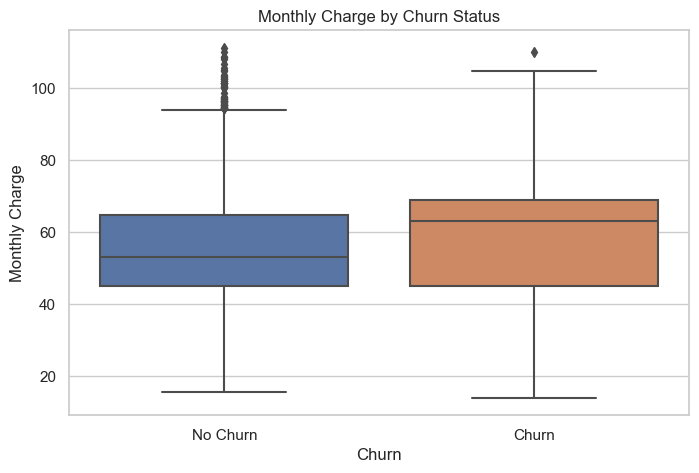

In [24]:
# Monthly Charge vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharge', data=df_viz)
plt.title('Monthly Charge by Churn Status')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.xlabel('Churn')
plt.ylabel('Monthly Charge')
plt.show()

Conclussion
Churn Distribution: There are fewer customers who churn, but still a significant number—this justifies the need for a predictive model.
Customer Service Calls: Customers who made many service calls are more likely to churn, suggesting poor support experiences may drive churn.
Data Plan: Customers without a data plan appear slightly more likely to churn. Offering personalized data plans could help reduce this.
Monthly Charge: Churning customers tend to have higher monthly charges on average, which likely indicates dissatisfaction with value for money.
